In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd

In [4]:
import sys
sys.path.append('./models') 
from gaussian import GP
from gaussian import RBF
from bandit import Bandit

sys.path.append('./train_data') 
from train_func import TrueFunc

In [36]:
# 教師データ
# 期待値関数のパラメータ設定
train_func_sigma = 0.1
train_func_max = 0.6
train_func = TrueFunc(train_func_sigma, train_func_max).peak_one

# モデルの設定
# RBFカーネルのパラメータ
rbf_alpha = 0.05
rbf_beta = 0.01
kernel = RBF(rbf_beta, rbf_alpha)

# ガウス過程のパラメータ
GP_ME = 0.5
gp_noise = 0.01

# プレイス　するバンディット問題の設定
n_play = 100
n_sample = 100

In [37]:
sys.path.append('../results') 
import b_plot

total reward is 14


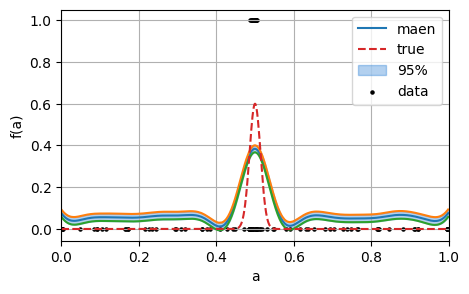

In [38]:
kernel = RBF(rbf_beta, rbf_alpha)
model = GP(GP_ME, gp_noise, kernel)

bandit = Bandit(n_play, n_sample)
train, reward = bandit.gp_ts(train_func, model)

print(f'total reward is {sum(reward)}')
p_train_func = TrueFunc(train_func_sigma, train_func_max, True).peak_one
b_plot.gp(model, p_train_func, train, reward, titel = "")

total reward is 10


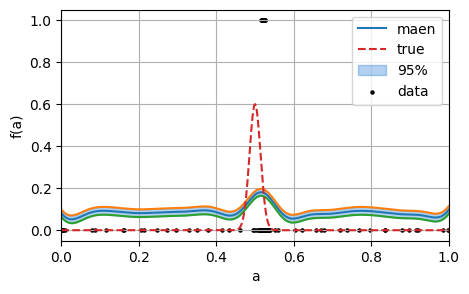

In [39]:
kernel = RBF(rbf_beta, rbf_alpha)
model = GP(GP_ME, gp_noise, kernel)
bandit = Bandit(n_play, n_sample)
train, reward = bandit.gp_ucb(train_func, model)

print(f'total reward is {sum(reward)}')
p_train_func = TrueFunc(train_func_sigma, train_func_max, True).peak_one
b_plot.gp(model, p_train_func, train, reward, titel = "")

total reward is 3


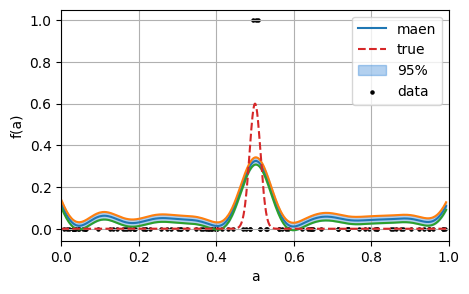

In [40]:
kernel = RBF(rbf_beta, rbf_alpha)
model = GP(GP_ME, gp_noise, kernel)
bandit = Bandit(n_play, n_sample)
train, reward = bandit.random(train_func, model)

print(f'total reward is {sum(reward)}')
p_train_func = TrueFunc(train_func_sigma, train_func_max, True).peak_one
b_plot.gp(model, p_train_func, train, reward, titel = "")

In [41]:
def plot_action(xout, yout, titel = ""):
    n_trial = len(yout)
    plt.figure(figsize=(5,3))
    plt.scatter(range(len(xout)),xout, s = 5, c=yout)
    plt.xlim(0,n_trial)
    plt.ylim(0,1)
    plt.grid()
    plt.title(titel)
    plt.xlabel('Trial')
    plt.ylabel('select arm')
    plt.show()

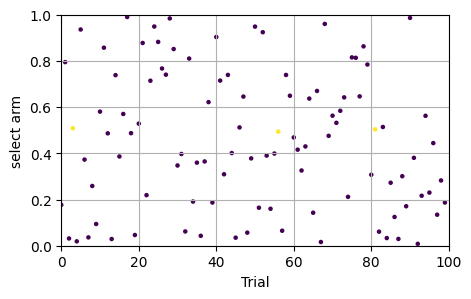

In [42]:
plot_action(train, reward)

In [29]:
def gp(model, xout, yout, title = "test"):
    xdist = np.sort(st.uniform().rvs(1000))
    dist = model.predict(xdist)
    plt.figure(figsize=(5,3))
    plt.plot(xdist, dist.mean(), label='maen')
    plt.plot(xdist, dist.isf(0.05))
    plt.plot(xdist, dist.isf(0.95))
    x = np.linspace(0, 1, 1000)
    plt.fill_between(xdist, dist.isf(0.95), dist.isf(0.05), label='95%', color='#0066cc', alpha=0.3)
    plt.scatter(xout, yout, label='data', color='black', marker='x', s=80)
    plt.xlim(0,1)
    plt.title(title)
    plt.xlabel('a')
    plt.ylabel('f(a)')
    plt.xlim(0,1)
    plt.ylim(-0.2,1.4)
    plt.grid()
    plt.legend()
    plt.show()

In [34]:
def gp_model_plot(rbf_alpha, rbf_beta, gp_noise):
    kernel = RBF(rbf_alpha, rbf_beta)
    model = GP(GP_ME, gp_noise, kernel)
    model.append(0.5, 1)
    train  = [0.5]
    reward= [1]
    gp(model, train, reward)

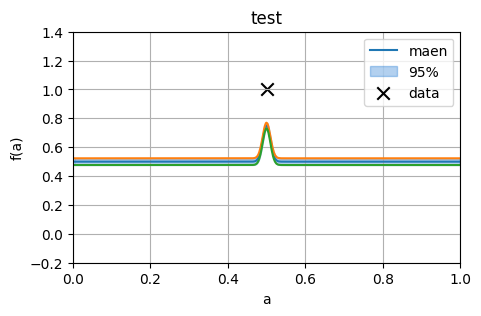

0.01 0.01 0.01


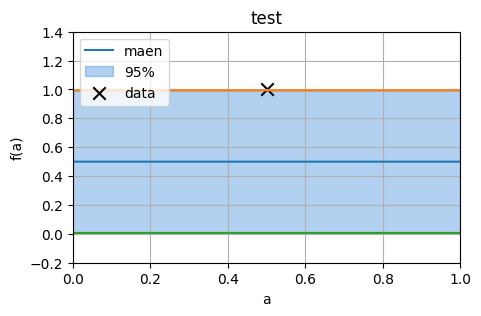

0.01 0.01 0.3


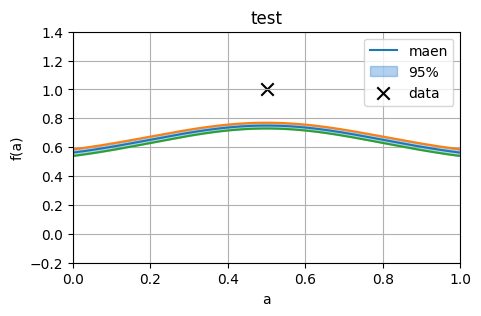

0.01 0.3 0.01


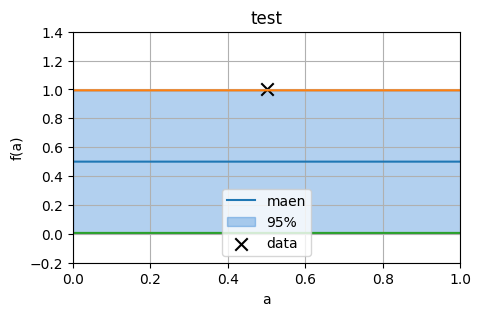

0.01 0.3 0.3


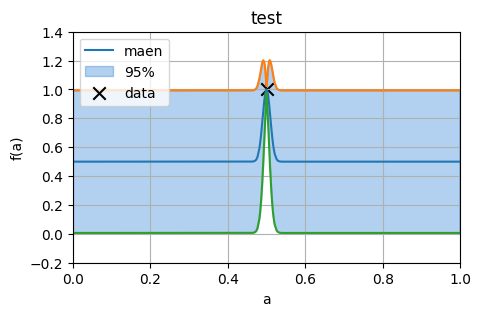

0.3 0.01 0.01


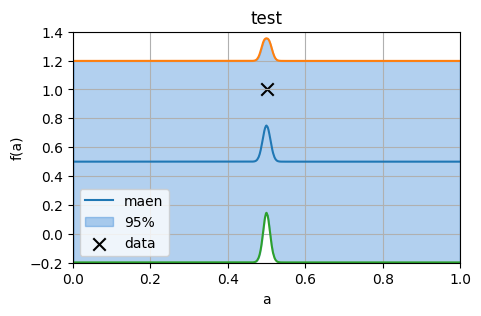

0.3 0.01 0.3


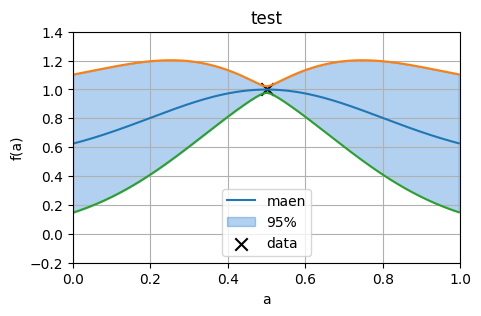

0.3 0.3 0.01


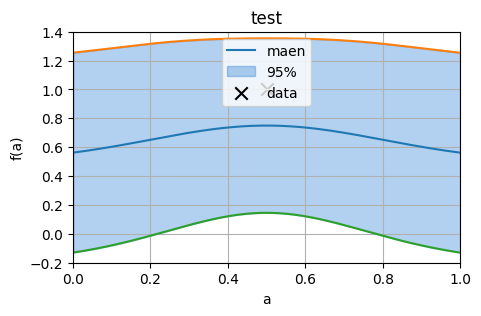

0.3 0.3 0.3


In [35]:
parameters_a = [0.01, 0.3]
parameters_b = [0.01, 0.3]
parameters_c = [0.01, 0.3]

for a in parameters_a:
    for b in parameters_b:
        for c in parameters_c:
            gp_model_plot(a, b, c)
            print(a, b, c)